# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### План работы:
   1. знакомство с данными
   2. выполнить предобработку (определить пропуски и заполнить их, преобразовать данные, устранить явные и неявные дубликаты)
   3. добавить новые столбцы (цена 1 кв.м., день недели,  месяц и год публикации, тип этажа, расстояние до центра (км)
   4. провести исследовательский анализ (Изучить параметры объектов, как быстро продавались квартиры, какие факторы влияют на стоитмость квартиры, вычислить цену квадратного метра, определить цену каждого км)
   5. сформулировать общий вывод
   

### Описание данных:

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

# Знакомство

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

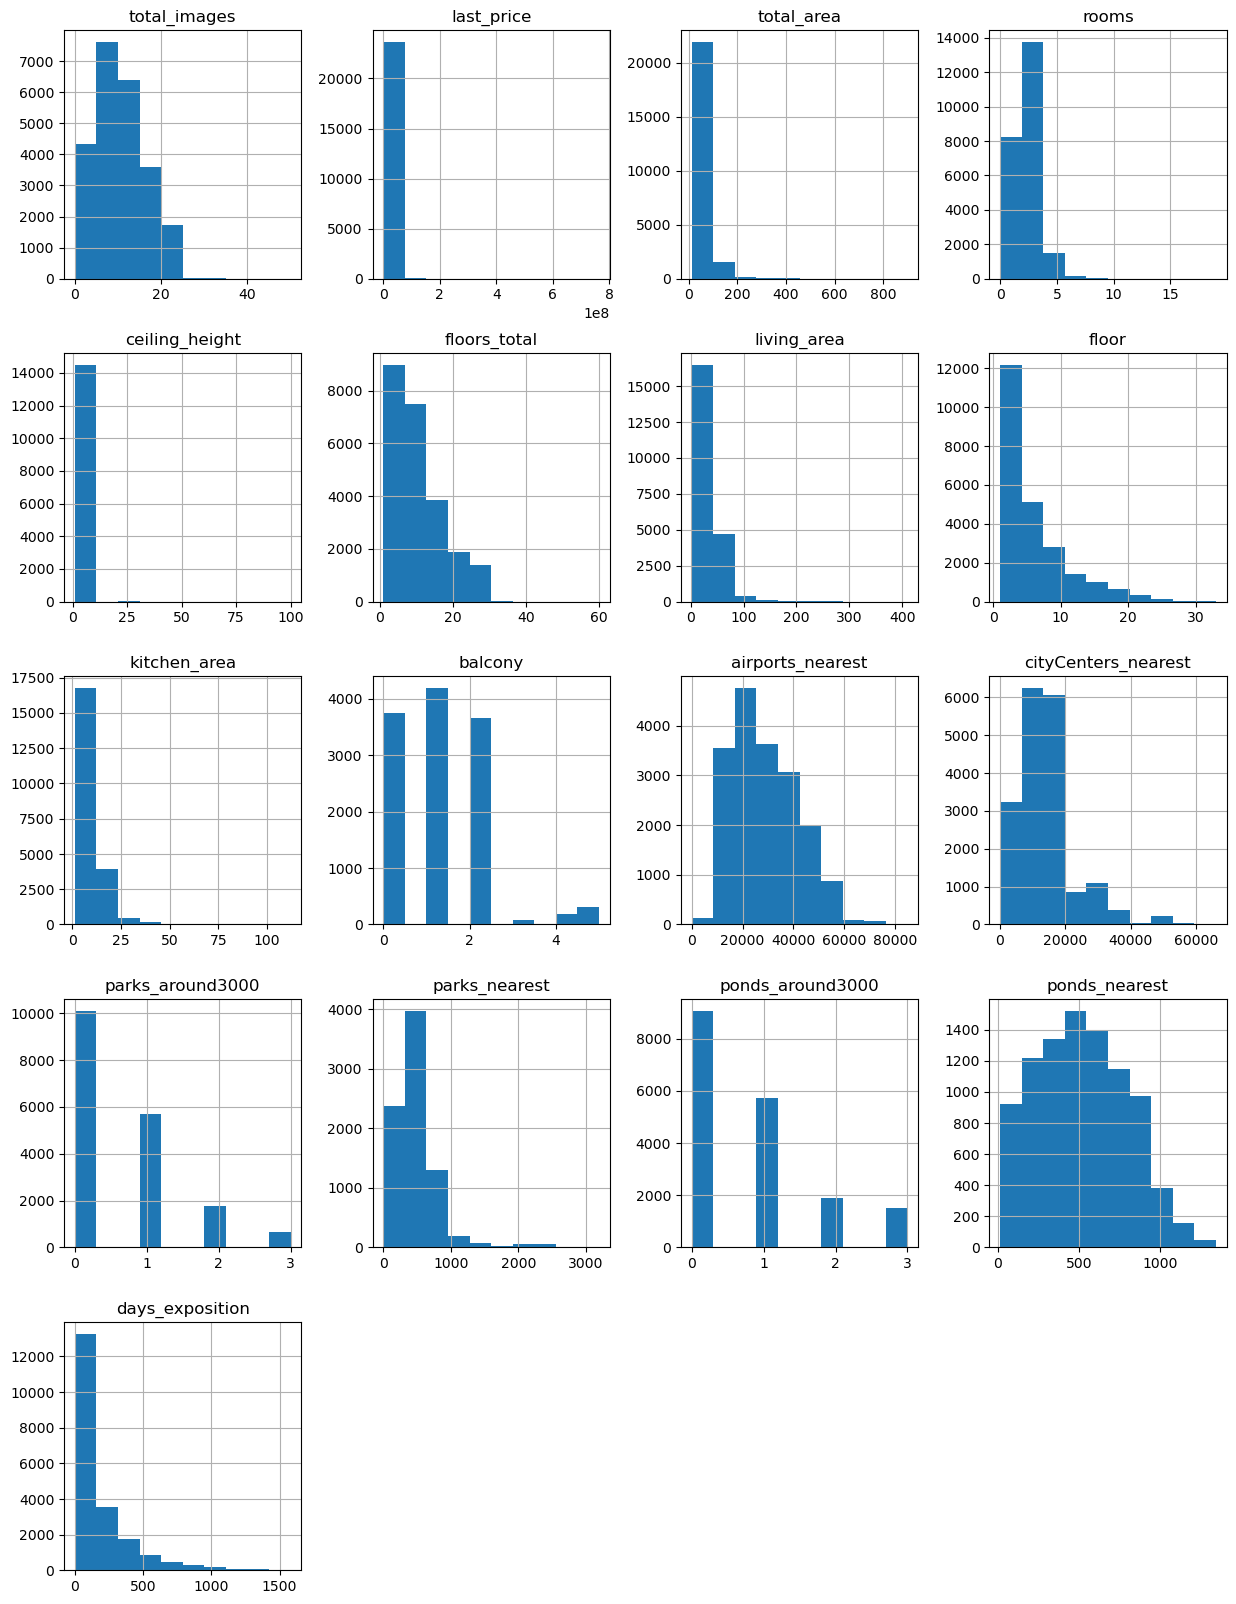

In [6]:
data.hist(figsize=(15, 20))

Вывод: датасет состоит из 23699 строк, имеются пропуски в некоторых столбцах. Построены первые гистограммы для наглядности.


# Предобработка данных

###### Проверим датасет на явные дубликаты и пропуски

In [7]:
data.duplicated().sum()

0

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

###### Проверим уникальные значения в столбце locality_name

In [9]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

###### Заполним пропуски в столбце balcony, приведем занчения в столбцах balcony и last price в соответствующий формат

In [10]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype(int)
data['last_price'] = data['last_price'].astype(int)

###### удалим неявные дубликаты в столбце locality name

In [11]:
data['locality_name'].unique()
duplicates = [ 'деревня Кудрово']
name = 'Кудрово'
data['locality_name'] = data['locality_name'].replace(duplicates,name)
duplicates = ['посёлок городского типа Красный Бор']
name = 'поселок городского типа Красный Бор'
data['locality_name'] = data['locality_name'].replace(duplicates,name)
duplicates = ['посёлок городского типа Вознесенье','посёлок Возрождение']
name ='посeлок Возрождение'
data['locality_name'] = data['locality_name'].replace(duplicates,name)
duplicates = ['городской посёлок Янино-1']
name ='городской посeлок Янино-1'
data['locality_name'] = data['locality_name'].replace(duplicates,name)
duplicates = ['посёлок Тельмана']
name ='поселок Тельмана'
data['locality_name'] = data['locality_name'].replace(duplicates,name)
duplicates = ['посёлок городского типа Рябово','поселок городского типа Рябово']
name ='поселок Рябово'
data['locality_name'] = data['locality_name'].replace(duplicates,name)
duplicates = ['посёлок Бугры']
name ='поселок Бугры'
data['locality_name'] = data['locality_name'].replace(duplicates,name)
duplicates = ['посёлок городского типа Вырица']
name = 'поселок городского типа Вырица'
data['locality_name'] = data['locality_name'].replace(duplicates,name)
duplicates = ['посёлок городского типа Токсово']
name = 'поселок городского типа Токсово'
data['locality_name'] = data['locality_name'].replace(duplicates,name)
duplicates = [ 'посёлок Жилгородок']
name ='поселок Жилгородок'
data['locality_name'] = data['locality_name'].replace(duplicates,name)
duplicates = ['посёлок Мурино','поселок Мурино']
name ='Мурино'
data['locality_name'] = data['locality_name'].replace(duplicates,name)
duplicates = ['посёлок Новый Свет']
name = 'поселок Новый Свет'
data['locality_name'] = data['locality_name'].replace(duplicates,name)
duplicates = ['посёлок Перово']
name ='поселок Перово'
data['locality_name'] = data['locality_name'].replace(duplicates,name)
duplicates = ['посёлок Победа']
name = 'поселок Победа'
data['locality_name'] = data['locality_name'].replace(duplicates,name) 
duplicates = ['посёлок Поляны']
name = 'поселок Поляны'
data['locality_name'] = data['locality_name'].replace(duplicates,name) 
duplicates = ['посёлок Сумино']
name = 'поселок Сумино'
data['locality_name'] = data['locality_name'].replace(duplicates,name) 
duplicates = ['посёлок Усть-Луга']
name = 'поселок Усть-Луга'
data['locality_name'] = data['locality_name'].replace(duplicates,name)
duplicates = ['посёлок городского типа Павлово','городской посёлок Павлово']
name ='село Павлово'
data['locality_name'] = data['locality_name'].replace(duplicates,name) 
duplicates = ['коттеджный посёлок Лесное']
name ='поселок Лесное'
data['locality_name'] = data['locality_name'].replace(duplicates,name) 
duplicates = ['посёлок Гаврилово']
name ='поселок Гаврилово'
data['locality_name'] = data['locality_name'].replace(duplicates,name) 
duplicates = ['посёлок городского типа Форносово']
name ='поселок городского типа Форносово'
data['locality_name'] = data['locality_name'].replace(duplicates,name) 
duplicates = ['посёлок Лисий Нос']
name ='поселок Лисий Нос'
data['locality_name'] = data['locality_name'].replace(duplicates,name) 
duplicates = ['посёлок Мичуринское']
name ='поселок Мичуринское'
data['locality_name'] = data['locality_name'].replace(duplicates,name) 
duplicates = ['посёлок Пансионат Зелёный Бор']
name ='поселок Пансионат Зелёный Бор'
data['locality_name'] = data['locality_name'].replace(duplicates,name) 
duplicates = ['поселок городского типа Рощино', 'посёлок городского типа Рощино']
name ='городской посёлок Рощино'
data['locality_name'] = data['locality_name'].replace(duplicates,name) 
duplicates = ['поселок городского типа Советский']
name ='городской посёлок Советский'
data['locality_name'] = data['locality_name'].replace(duplicates,name) 
duplicates = ['деревня Фёдоровское']
name ='городской посёлок Фёдоровское'
data['locality_name'] = data['locality_name'].replace(duplicates,name)
duplicates = ['поселок городского типа Большая Ижора']
name ='городской поселок Большая Ижора'
data['locality_name'] = data['locality_name'].replace(duplicates,name)

###### напишем цикл, преобразуем возможные аномальные значения ceiling height, удалим аномальные значения

In [12]:
for x in data['balcony'].unique():
    data.loc[(data['balcony']==x)&(data['ceiling_height'].isna()),'ceiling_height']=\
    data.loc[(data['balcony']==x),'ceiling_height'].mean()
    
data['ceiling_height'] = data['ceiling_height'].replace(32.0, 3.2)
data['ceiling_height'] = data['ceiling_height'].replace(27.5, 2.75)
data['ceiling_height'] = data['ceiling_height'].replace(27.0, 2.70)
data['ceiling_height'] = data['ceiling_height'].replace(26.0, 2.60)
data['ceiling_height'] = data['ceiling_height'].replace(25.0, 2.50)
data['ceiling_height'] = data['ceiling_height'].replace(24.0, 2.40)
data['ceiling_height'] = data['ceiling_height'].replace(22.6, 2.26)
data['ceiling_height'] = data['ceiling_height'].replace(20.0, 2.00)

data = data[(data['ceiling_height']!=100.00)&(data['ceiling_height']!=1.00)&(data['ceiling_height']!=1.20)&(data['ceiling_height']!=1.75)&(data['ceiling_height']!=14.00)&(data['ceiling_height']!=10.30)]

data = data[(data['floors_total']!= 1)&(data['floors_total']!= 33)&(data['floors_total']!= 35)&(data['floors_total']!= 28)&(data['floors_total']!= 36)&(data['floors_total']!= 29)&(data['floors_total']!= 60)&(data['floors_total']!= 52)&(data['floors_total']!= 34)&(data['floors_total']!= 32)]
data = data[(data['last_price']!=420000000)]

Заменила пропуски в столбце ceiling_height средним значением, а также заменили аномальные значения в этом же столбце на более реальные(например, высоту 25 м или 35 м на 2.5 и 3.5 соответственно, т.к. скорее всего запятая/точка была пропущена из-за человеческого фактора). Нереально большую и слишком маленькую высоту потолков решила убрать(1м,7м,10м, 14м), т.к. их немного. Также убрала излишне высокоэтажные здания (60 этажей, 30 этажей) т.к. в Спб таких практически нет.

###### Заполним пропущенные данные в столбце floor_total из столбца floor. Преобразуем данные в столбцах floor. Добавим новый столбцец is_apartment. 

In [13]:
data['floors_total'] = data['floors_total'].fillna(data['floor'])
data['floors_total'] = data['floors_total'].astype(int)
data['floor'] = data['floor'].astype(int)
data['is_apartment'] = data['is_apartment'].fillna(False)

In [14]:
data.sort_values(by='last_price', ascending = False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,763000000,400.0,2017-09-30T00:00:00,7,2.762338,10,250.0,10,False,...,NaN,2,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0
14706,15,401300000,401.0,2016-02-20T00:00:00,5,2.718108,9,204.0,9,False,...,24.0,3,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0
1436,19,330000000,190.0,2018-04-04T00:00:00,3,3.500000,7,95.0,5,False,...,40.0,0,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
15651,20,300000000,618.0,2017-12-18T00:00:00,7,3.400000,7,258.0,5,False,...,70.0,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
22831,18,289238400,187.5,2019-03-19T00:00:00,2,3.370000,6,63.7,6,False,...,30.2,0,Санкт-Петербург,22494.0,1073.0,3.0,386.0,3.0,188.0,NaN


###### Расчитаем стоимость одного метра

In [15]:
data['one_metr_price'] = data['last_price']/data['total_area']

###### Преобразуем формат даты в столбце с датой

In [16]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M')

###### Добавим новый столбец weekday

In [17]:
data['weekday'] = data['first_day_exposition'].dt.weekday

###### Напишем цикл для сортировки дат по дням недели

In [18]:
def categorize_weekday(weekday):
    try:
        if weekday==0:
            return 'пн'
        elif weekday==1:
            return 'вт'
        elif weekday==2:
            return 'ср'
        elif weekday==3:
            return 'чт'
        elif weekday==4:
            return 'пт'
        elif weekday==5:
            return 'сб'
        elif weekday==6:
            return 'вс'
    except:
        pass

In [19]:
data['weekday_2']=data['weekday'].apply(categorize_weekday)

###### Добавим столбец с месяцем и годом

In [20]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

###### Рассмотрим распеределение количества этажей

In [21]:
data['floors_total'].value_counts()

5     5791
9     3766
16    1375
12    1367
4     1210
10    1177
25    1074
6      923
17     834
3      672
7      596
14     554
18     508
24     471
8      398
2      384
15     368
23     353
19     342
22     287
20     273
13     232
11     206
27     164
21     162
26     124
1        3
Name: floors_total, dtype: int64

###### Добавим столбец с признаком этажа (первый, последний, другой)

In [22]:
data['new_floor'] = 0
data.loc[data['floor']==1, 'new_floor']='первый'
data.loc[data['floors_total']-data['floor']==0, 'new_floor']='последний'
data.loc[data['new_floor']==0, 'new_floor']= 'другой'

###### Добавим столбец с расстоянием до центра

In [23]:
data['center_km'] = round(data['cityCenters_nearest']/1000)

In [24]:
data.sort_values(by='last_price', ascending = False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,one_metr_price,weekday,weekday_2,month,year,new_floor,center_km
12971,19,763000000,400.0,2017-09-30,7,2.762338,10,250.0,10,False,...,3.0,756.0,33.0,1.907500e+06,5,сб,9,2017,последний,4.0
14706,15,401300000,401.0,2016-02-20,5,2.718108,9,204.0,9,False,...,1.0,478.0,393.0,1.000748e+06,5,сб,2,2016,последний,2.0
1436,19,330000000,190.0,2018-04-04,3,3.500000,7,95.0,5,False,...,3.0,285.0,233.0,1.736842e+06,2,ср,4,2018,другой,1.0
15651,20,300000000,618.0,2017-12-18,7,3.400000,7,258.0,5,False,...,2.0,198.0,111.0,4.854369e+05,0,пн,12,2017,другой,5.0
22831,18,289238400,187.5,2019-03-19,2,3.370000,6,63.7,6,False,...,3.0,188.0,NaN,1.542605e+06,1,вт,3,2019,последний,1.0


ВЫВОД: 

В данном разделе в столбце balcony заменила на ноль, так как скорее всего, если пользователь не указал их, значит они отсутствуют, а также перевела данные в этом столбце в числовой формат.
Также проверила дата сет на явные дубликаты и проверила пропущенные значения. Также проверила на неявные дубликаты столбец locality_name и привели все наименования к единому написанию(e-ё, сокращенные наименования поселков и пр.)
Проверила средние значения и межквартильные диапазоны. Заменила пропуски в столбце ceiling_height средним значением, а также заменили аномальные значения в этом же столбце на более реальные(например, высоту 25 м или 35 м на 2.5 и 3.5 соответственно, т.к. скорее всего запятая/точка была пропущена из-за человеческого фактора).
Нереально большую и слишком маленькую высоту потолков решила убрать(1м,7м,10м, 14м), т.к. их немного. Также убрала излишне высокоэтажные здания (60 этажей, 30 этажей) т.к. в Спб таких практически нет.
А отсутствующие значения в столбце total_floor дополнила значениями из столбца floor, так мы будем иметь хоть какое-то представление об этажности здания. Также перевела оба столбца в числовой формат. В столбце is_apartment заменила пропущенные значения на False, скорее всего это поле было не заполнено пользователем по незнанию.
В датасете 23699 строк, из них пропущеные значения присутствуют в столбцах balcony, total_floor, ceiling_height, is_apartment (то, что заполняется пользователем) и имеются пропущенные данные в столюцах с информацией об удаленности парков, прудов, количестве дней публикации объявлений и пр.

Добавила новый столбец - цену за кв. м. Перевела в столбец first_day_exposition в соответствующий формат. Проставила дни недели от даты публикации. Прописала функцию для написания сокращенного вида дней недели и применила функцию к столбцу weekday. Выделили месяц и год в отдельные столбцы. Создала новый столбец для этажа: если этаж первый, то добавляю из floor в новый стобец. Если разница между последним этажом и этажом квартиры равно 0, то он последний, значит добавляю его в новый столбец. Пропущенные значения этажей заменила на другой. Добавила новый стоблец, расстояние до центра в км(значение округлила).

# Исследовательский анализ

###### Рассмотрим распределение общей площади квартир в столбце total_area по метражу

<Axes: title={'center': 'Площадь квартир'}, ylabel='Frequency'>

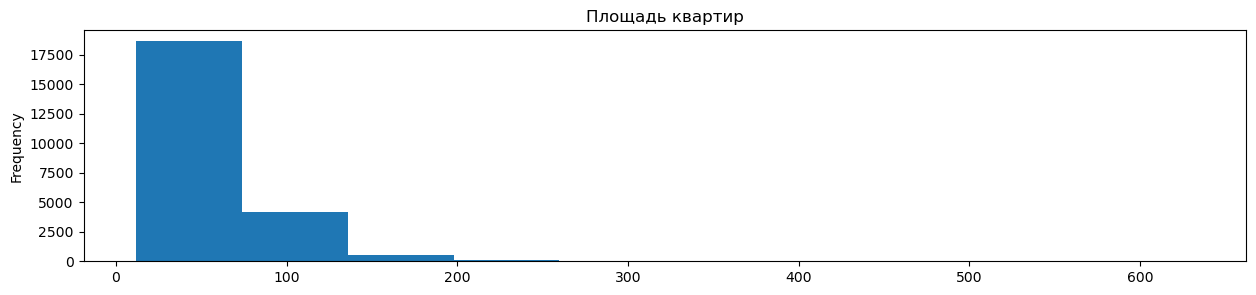

In [25]:
data['total_area'].plot(kind='hist', figsize=(15,3), title='Площадь квартир')

в среднем общая площадь варьируется от 25 до 100 кв м, таких квартир порядка 20 тыс

###### Рассмотрим распределение метража living area 

<Axes: title={'center': 'Жилая площадь'}, ylabel='Frequency'>

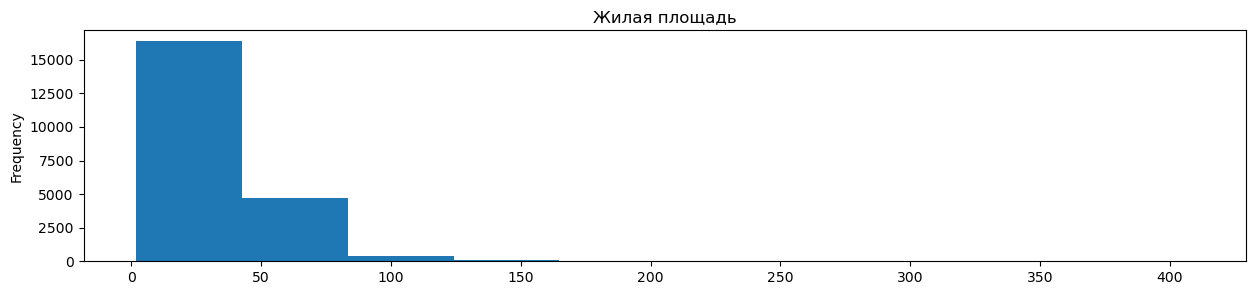

In [26]:
data['living_area'].plot(kind='hist', figsize=(15,3), title='Жилая площадь')

15 тыс квартир площадью до 40 кв.м., 5 тыс квартир площадью до 70-80 кв.м.

###### Рассмотрим распределение метража kitchen area

<Axes: title={'center': 'Площадь кухни'}, ylabel='Frequency'>

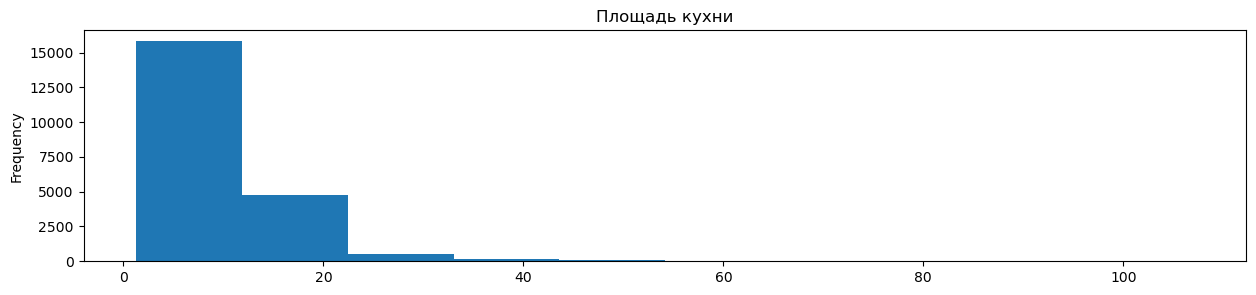

In [57]:
data['kitchen_area'].plot(kind='hist', figsize=(15,3), title='Площадь кухни')

в основном площадь кухни составляет до 20 кв м

###### Рассмотрим распределение стоимости квартир

<Axes: title={'center': 'Стоимость квартир'}>

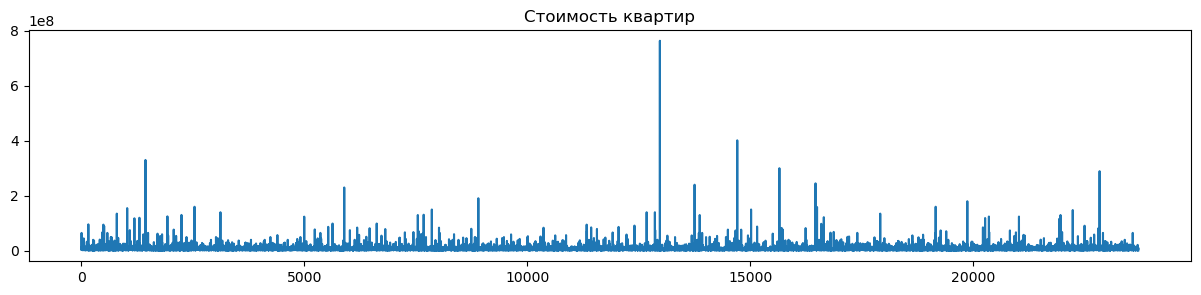

In [60]:
data['last_price'].plot(figsize=(15,3), title='Стоимость квартир')

минимальная стоимость меньше 1 млн, одна из самых дорогих квартир стоит около 8 млн, в среднем цены варьируются до 2 млн

###### Рассмотрим распределение количества комнат

<Axes: title={'center': 'Количество комнат в квартире'}, ylabel='Frequency'>

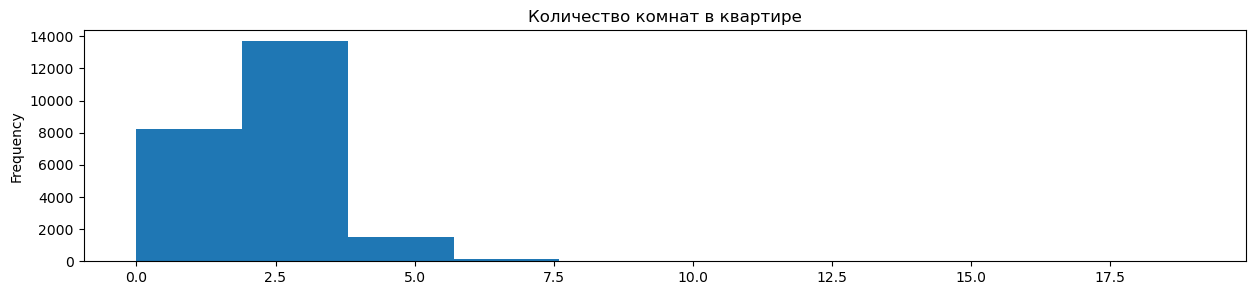

In [62]:
data['rooms'].plot(kind='hist', figsize=(15,3), title='Количество комнат в квартире')

около 8 тыс квартир 1-комнатные, 14 тыс квартир 2-4-комнатные, около 1 тыс квартир 5-комнатные

###### Рассмотрим распределение метража потолков

<Axes: title={'center': 'Метраж потолка'}, ylabel='Frequency'>

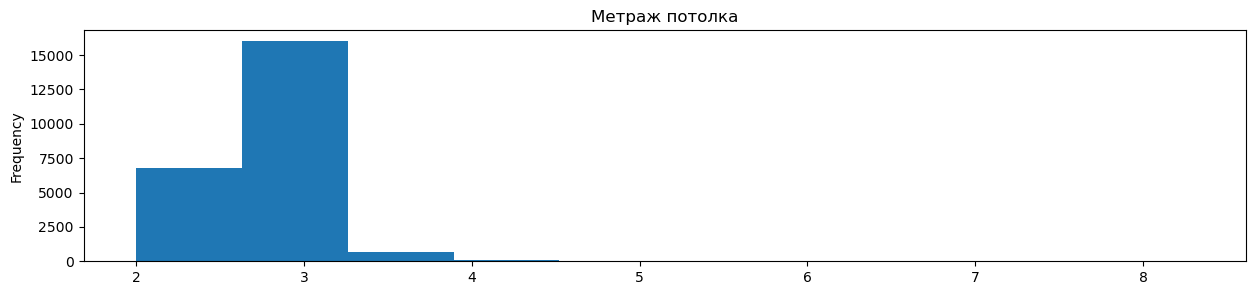

In [63]:
data['ceiling_height'].plot(kind='hist', figsize=(15,3), title='Метраж потолка')

в основном 95% квартир имеют высоту потолков 2-3 м 

###### Рассмотрим распределение количества значений по столбцу floor

<Axes: title={'center': 'Этаж квартиры'}, ylabel='Frequency'>

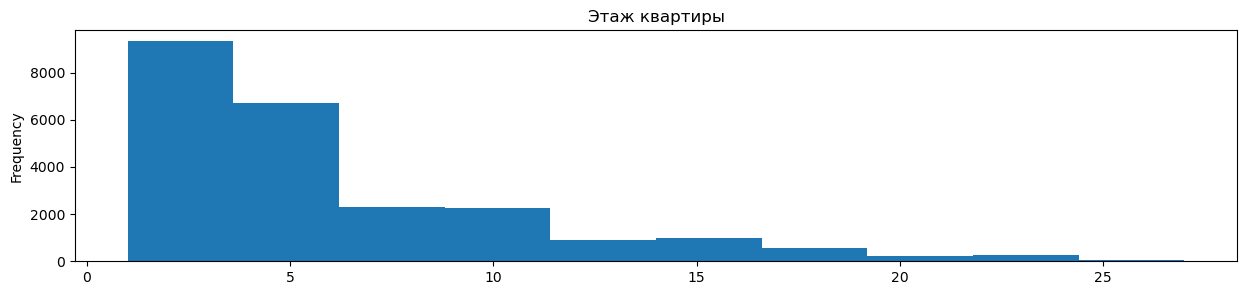

In [65]:
data['floor'].plot(kind='hist', figsize=(15,3), title='Этаж квартиры')

 около 19 тыс квартир находится с 1 по 10 этаж, 3-4 тыс располагаются с 10 по 20 этажи

###### Рассмотрим распределение количества квартир между последним, первым и другим этажом

<Axes: >

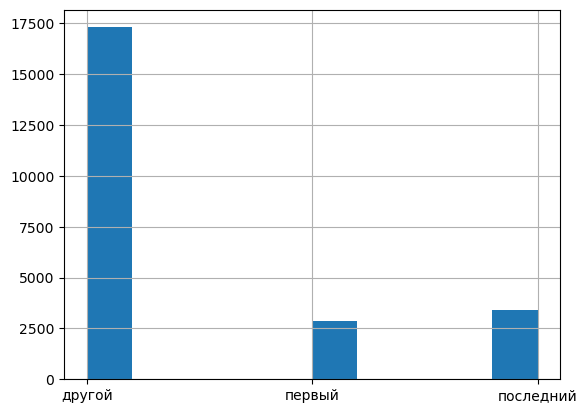

In [69]:
data['new_floor'].hist(bins=10)

примерно 17 тыс квартир находятся ни на первом, ни на последнем этажах, суммарно около 6 тыс квартир находится на певром и последних этажах 

###### Рассмотрим распределение квартир относительно центра

<Axes: title={'center': 'Удаленность от центра'}, ylabel='Frequency'>

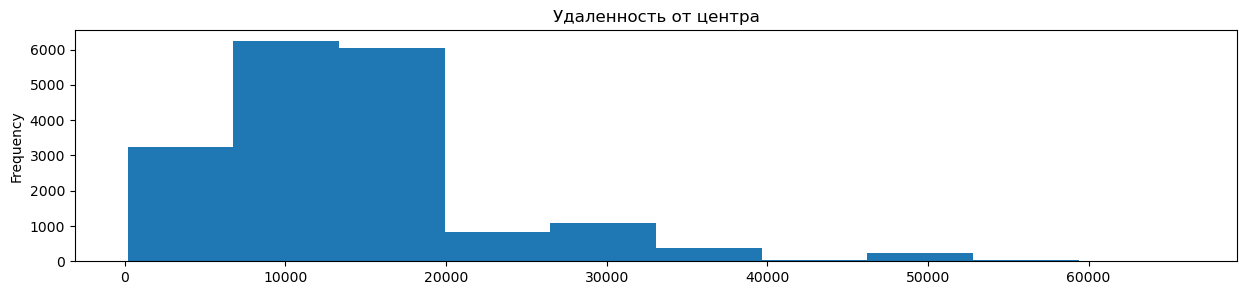

In [70]:
data['cityCenters_nearest'].plot(kind='hist', figsize=(15,3), title='Удаленность от центра')

Большая часть квартир находится на расстоянии до 20 тыс м

###### Рассмотрим распределение квартир относительно близости к аэропорту

<Axes: title={'center': 'Удаленность от аэропорта'}, ylabel='Frequency'>

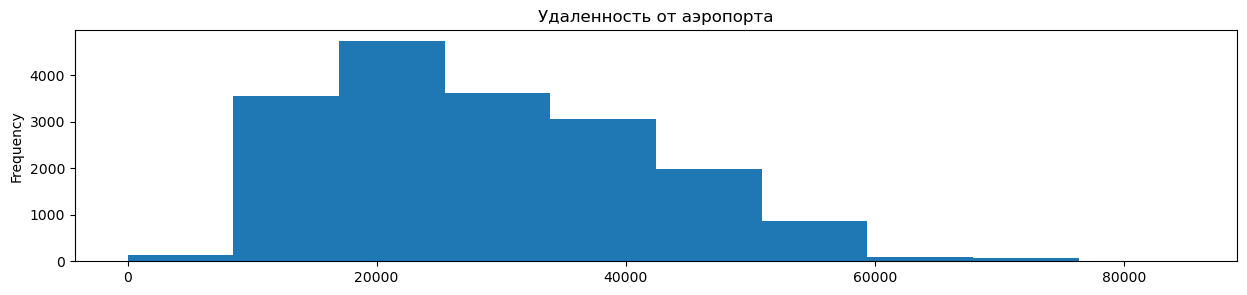

In [71]:
data['airports_nearest'].plot(kind='hist', figsize=(15,3), title='Удаленность от аэропорта')

в среднем квартиры находятся от ближайшего аэропорта от 10 до 60 тыс м

###### Рассмотрим распределение квартир относительно близости к паркам

<Axes: title={'center': 'Расстояние до парка'}, ylabel='Frequency'>

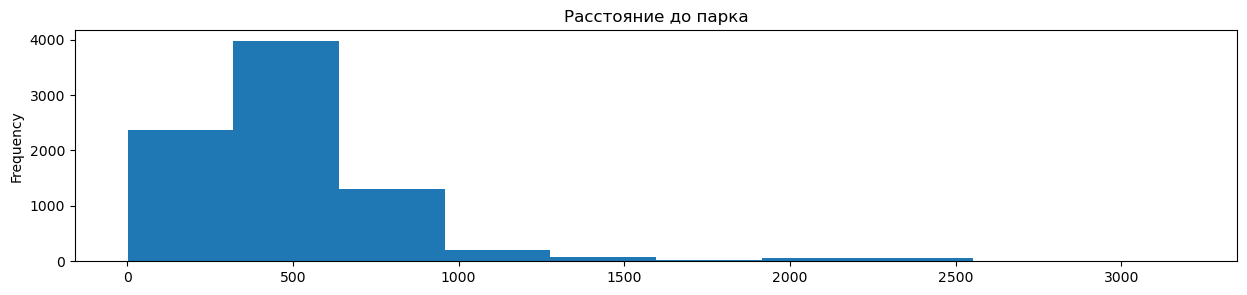

In [72]:
data['parks_nearest'].plot(kind='hist', figsize=(15,3), title='Расстояние до парка')

4 тыс кв имеют парк в 400-600 м, для 2,5 тыс кв-р парк находтся на расстоянии до 300 м

###### Рассмотрим распределение продаж квартир по месяцам

<Axes: title={'center': 'Публикации объявлений по месяцам'}, ylabel='Frequency'>

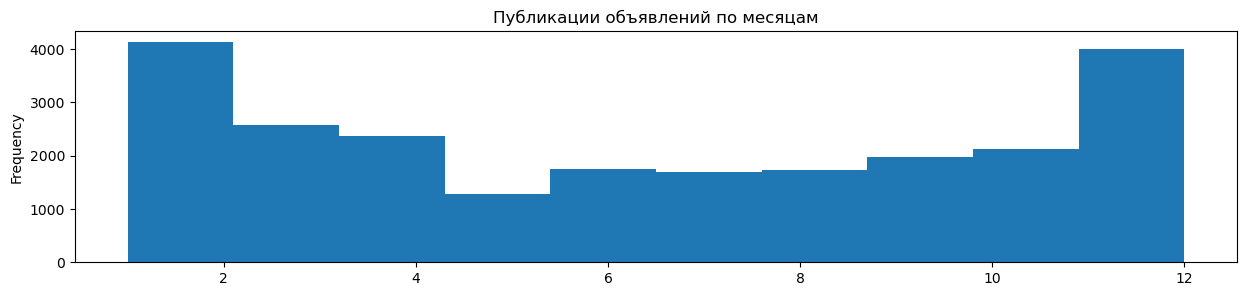

In [74]:
data['month'].plot(kind='hist', figsize=(15,3), title='Публикации объявлений по месяцам')

по 4 тыс публикаций в янв-фев и дек, по 2 тыс весной, осенью и летом 

###### Рассмотрим распределение продаж квартир по дням недели 

<Axes: title={'center': 'Публикации объявлений по дням'}>

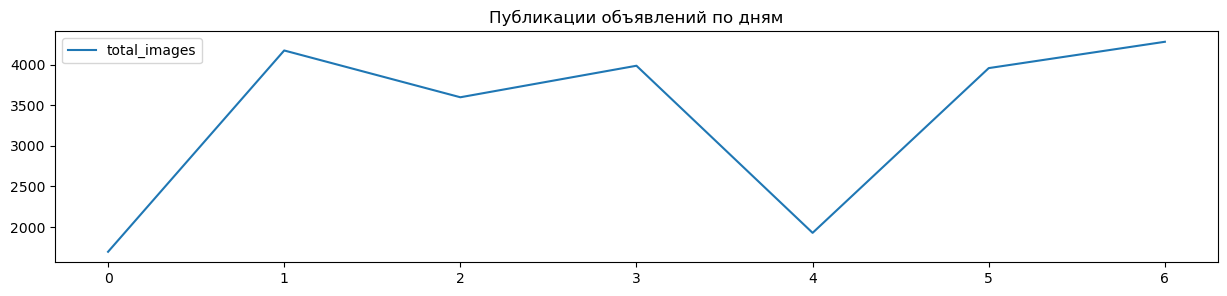

In [77]:
data.groupby('weekday_2', as_index=False)
    .agg({'total_images':'count'})
    .plot(figsize=(15,3), title='Публикации объявлений по дням')

 чт, вт, сб,вс публикуется примерно по 4 тыс объявлений,в пт наименьшее число публикаций объявлений - менее 2000

###### Рассмотрим сколько было опубликовано объявление (среднее и медианное значение) по городам

,mean,median
,days_exposition,days_exposition
locality_name,,
Бокситогорск,89.571429,45.0
Волосово,287.366667,135.5
Волхов,152.400000,104.0
Всеволожск,197.085546,123.0
Выборг,177.375000,99.5
...,...,...
село Путилово,261.500000,261.5
село Рождествено,99.000000,99.0


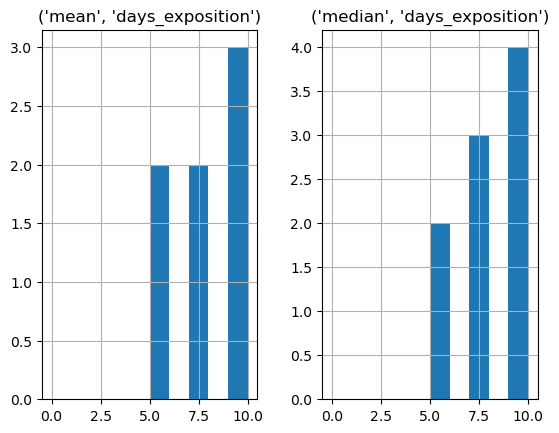

In [78]:
data.pivot_table(index='locality_name', values='days_exposition', aggfunc=['mean','median']).hist(range=(0,10))
data.pivot_table(index='locality_name', values='days_exposition', aggfunc=['mean','median'])

Если рассматривать средние значения, то объявление находится около 200 дней и далее идет постепенное снижение. Самый долгий срок 400 дней. Если рассматривать медианные значения самое высокое это 80 дней, самое менешее 400 дней.

###### Рассмотрим зависимость цены от общего метража

<Axes: title={'center': 'Зависимость цен от кв м'}, xlabel='total_area', ylabel='last_price'>

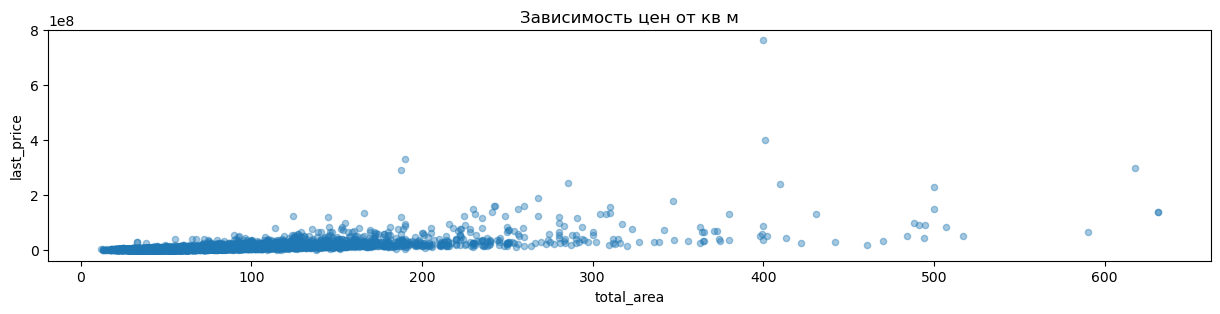

In [86]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.4, figsize=(15,3), title='Зависимость цен от кв м')

При увеличении площади квартиры цена растет пропорционально.

###### Рассмотрим зависимость цены от метража жилой площади

<Axes: title={'center': 'Зависимость цены от жилой площади'}, xlabel='living_area', ylabel='last_price'>

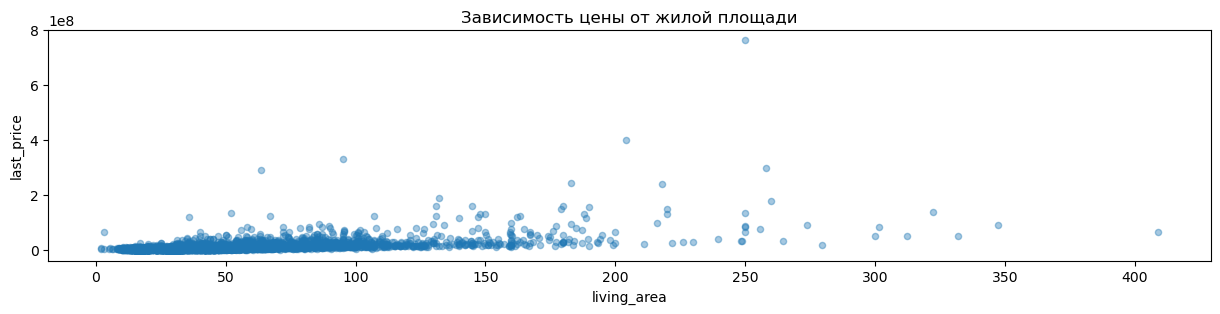

In [85]:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.4, figsize=(15,3), title ='Зависимость цены от жилой площади')

Жилая площадь также влияет на увеличение стоимости квартиры.

###### Рассмотрим зависимость цены от метража кухни

<Axes: title={'center': 'Зависимость цены квартиры от метража кухни'}, xlabel='kitchen_area', ylabel='last_price'>

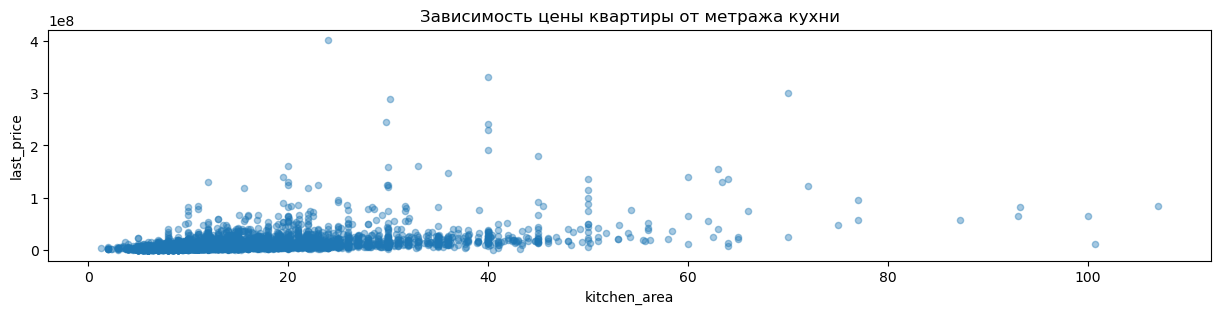

In [84]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.4,figsize=(15,3), title='Зависимость цены квартиры от метража кухни' )

В целом большая площадь кухни не сильно влияет на конечную стоимость квартиры,но все же увеличивает ее стоимость.

###### Рассмотрим зависимость цены от количества комнат

<Axes: title={'center': 'Зависимость цены от количества комнат'}, xlabel='rooms'>

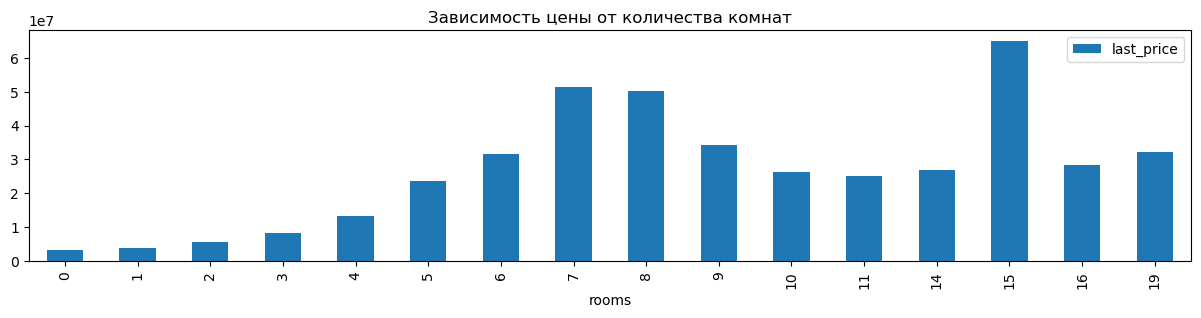

In [90]:
rooms_to_price = data.pivot_table(index='rooms', values='last_price', aggfunc='mean')
rooms_to_price.plot(y='last_price', kind='bar', legend=True, figsize=(15,3), title='Зависимость цены от количества комнат')

Цены увеличиваются в соответствии с количеством комнат. Стоимость от 5-комнатных начинается с 14 млн. Самая дорогая квартира -15комнатная.

###### Рассмотрим зависимость цены от нахождения квартиры на этаже

<Axes: title={'center': 'Зависимость цены от этажа квартиры'}, xlabel='new_floor'>

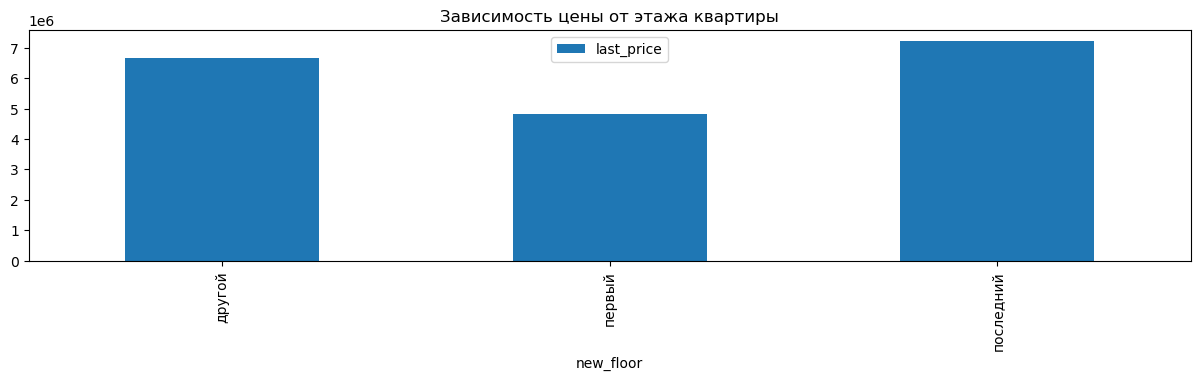

In [89]:
floor_price = data.pivot_table(index='new_floor', values='last_price', aggfunc='mean')
floor_price.plot(y='last_price', kind='bar', legend=True, figsize=(15,3), title = 'Зависимость цены от этажа квартиры')

Самые дорогие квартиры на последних этаж, чуть дешевле на других. Квартиры на первых этажах как и ожидалось продаются дешевле.

###### Рассмотрим зависимость цены от дня недели

<Axes: title={'center': 'Зависимость цены от дня недели'}, xlabel='weekday_2'>

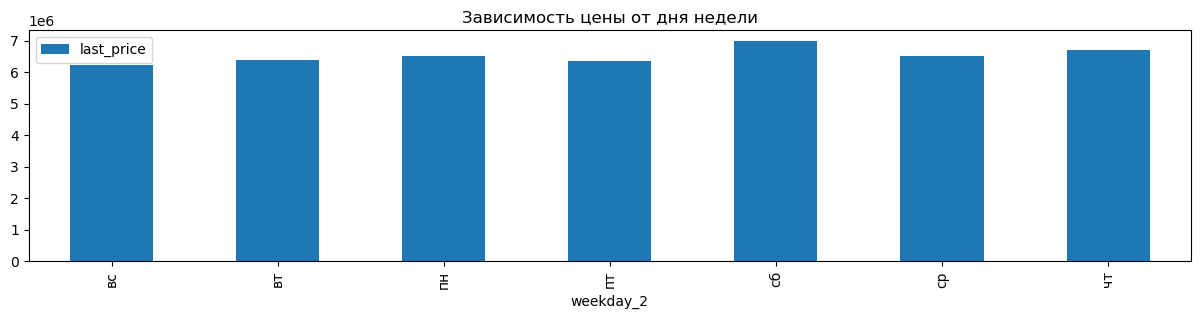

In [92]:
weekday_price = data.pivot_table(index='weekday_2', values='last_price', aggfunc='mean')
weekday_price.plot(y='last_price', kind='bar', legend=True, title = 'Зависимость цены от дня недели', figsize=(15,3))

Зависимости между днями и стоимостью не наблюдается, едиснтвенное, что чуть больше стоят квартиры, чьи объявления опубликованы в сб.

###### Рассмотрим зависимость цены от месяца года

<Axes: title={'center': 'Зависимость цены от месяца'}, xlabel='month'>

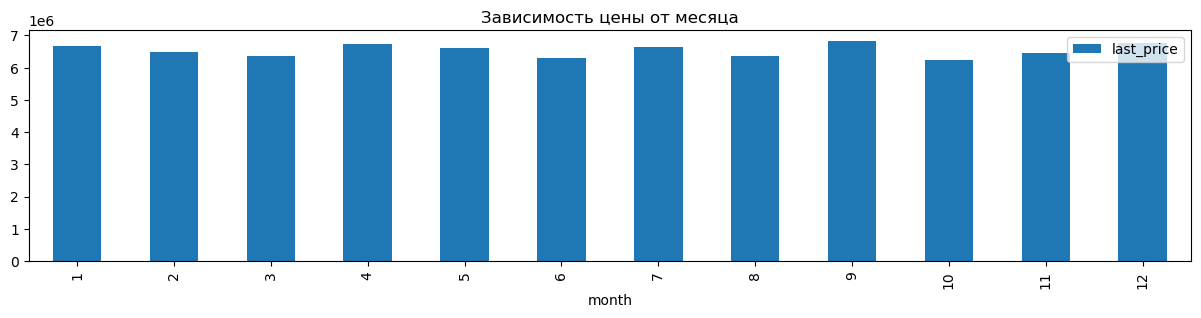

In [94]:
month_to_price = data.pivot_table(index='month', values='last_price', aggfunc='mean')
month_to_price.plot(y='last_price', kind='bar', legend=True, title = 'Зависимость цены от месяца', figsize=(15,3))

Также и по месяцам, продажи квартиры не особо завязаны на месяце, в котором они пуликовались. Чуть больше стоят квартиры опубликованные в апреле, июле, сентябре и декабре.

###### Рассмотрим зависимость цены от года

,last_price
year,
2014,7700000
2015,5350000
2016,4550000
2017,4500000
2018,4550000
2019,5050000


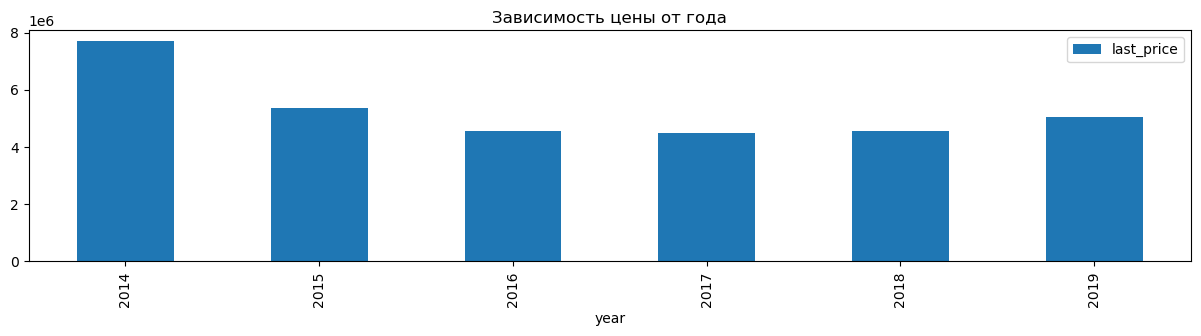

In [95]:
year_to_price = data.pivot_table(index='year', values='last_price', aggfunc='median')
year_to_price.plot(y='last_price', kind='bar', legend=True, title = 'Зависимость цены от года', figsize=(15,3))
year_to_price

Самые дорогие квартиры были в 2014 году, в остальные годы цены находились примерно на одном уровне. Возможно как-то повлиял кризис 2014 года.

###### Рассмотрим распределение количества квартир по городам

In [47]:
data['locality_name'].value_counts().head(10)

Санкт-Петербург      15671
Мурино                 586
Кудрово                472
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      321
Гатчина                307
Выборг                 237
Name: locality_name, dtype: int64

По срезу ТОП-10 по самым большим количествам обявлений Санкт-Петербург -15671 объявление, Мурино -586, Кудрово-472.

###### Рассмотрим распределение цены одного метра по городам

In [48]:
data.query('locality_name in ["Санкт-Петербург","Мурино", "Кудрово","посёлок Шушары","Всеволожск","Пушкин","Колпино","посёлок Парголово","Гатчина","Выборг"]').groupby('locality_name')['one_metr_price'].mean()

locality_name
Всеволожск            68654.473986
Выборг                58141.909153
Гатчина               68746.146763
Колпино               75424.579098
Кудрово               95324.930544
Мурино                86134.673802
Пушкин               103125.819291
Санкт-Петербург      114803.167526
посёлок Парголово     90124.910061
посёлок Шушары        78677.364217
Name: one_metr_price, dtype: float64

Самый дорогой средний метр в Санкт-Петербурге - 114803 руб/кв м и Пушкин - 103125 руб/кв м. Самый недорогой метраж в Выборге - 58141 руб/кв м.

###### Рассмотрим распределение кв метра в Санкт-Петербурге в зависимости от км до центра

In [96]:
data_spb = (data
            .query('locality_name=="Санкт-Петербург"')
            .pivot_table(index='center_km', values='one_metr_price', aggfunc='mean')
            .reset_index(False))
data_spb.sort_values(by='center_km', ascending=False).head()

,center_km,one_metr_price
29,29.0,72953.365445
28,28.0,81161.915320
27,27.0,132115.709459
26,26.0,89285.876593
25,25.0,91531.371618


Близость от центра также влияет на стоимость квартиры. Чем ближе к центру, тем дороже. От 10 до 16 км от центра стоимость кв.м вариируется в пределах 112-110 тыс р, более 20 км от центра цена в пределах 80-90 тыс за кв м.

Вывод:

В среднем общая площадь варьируется от 25 до 100 кв м, таких квартир порядка 20 тыс. 15 тыс квартир площадью до 40 кв.м., 5 тыс квартир площадью до 70-80 кв.м. В основном площадь кухни составляет до 20 кв м. Минимальная стоимость меньше 1 млн, одна из самых дорогих квартир стоит около 8 млн, в среднем цены варьируются до 2 млн. Около 8 тыс квартир 1-комнатные, 14 тыс квартир 2-4-комнатные, около 1 тыс квартир 5-комнатные. В основном 95% квартир имеют высоту потолков 2-3 м. Около 19 тыс квартир находится с 1 по 10 этаж, 3-4 тыс располагаются с 10 по 20 этажи. Примерно 17 тыс квартир находятся ни на первом, ни на последнем этажах, суммарно около 6 тыс квартир находится на певром и последних этажах. Большая часть квартир находится на расстоянии до 20 тыс м. В среднем квартиры находятся от ближайшего аэропорта от 10 до 60 тыс м. 4 тыс кв имеют парк в 400-600 м, для 2,5 тыс кв-р парк находтся на расстоянии до 300 м. По 4 тыс публикаций в янв-фев и дек, по 2 тыс весной, осенью и летом. В чт, вт, сб,вс публикуется примерно по 4 тыс объявлений,в пт наименьшее число публикаций объявлений - менее 2000
Если рассматривать средние значения, то объявление находтся около 200 дней и далее идет постепенное снижение. Самый долгий срок 400 дней. Если рассматривать медианные значения самое высокое это 80 дней, самое менешее 400 дней. При увеличении площади квартиры цена растет пропорционально. Жилая площадь также влияет на увеличение стоимости квартиры. В целом большая площадь кухни не сильно влияет на конечную стоимость квартиры,но все же увеличивает ее стоимость.

Самые дорогие квартиры на последних этаж, чуть дешевле на других. Квартиры на первых этажах как и ожидалось продаются дешевле. Самые недорогие квартиры студии и однокомнатные. В основном цены увеличиваются в соответствии с количеством комнат. Стоимость от 5-комнатных начинается с 14 млн. Самая дорогая квартира -15комнатная. Зависимости между днями и стоимостью не наблюдается, едиснтвенное, что чуть больше стоят квартиры, чьи объявления опубликованы в сб. Также и по месяцам, продажи квартиры не особо завязаны на месяце, в котором они пуликовались. Чуть больше стоят квартиры опубликованные в апреле, июле, сентябре и декабре.
По зависимости цены от года можно сказать, что самые дорогие квартиры были в 2014 году, в остальные годы цены находились примерно на одном уровне. Возможно как-то повлиял кризис 2014 года.

По срезу ТОП-10 по самым большим количествам обявлений Санкт-Петербург -15671 объявление, Мурино -586, Кудрово-472. Самый дорогой средний метр в Санкт-Петербурге - 114803 руб/кв м и Пушкин - 103125 руб/кв м. Самый недорогой метраж в Выборге - 58141 руб/кв м.

Самые долгопродаваемыми квартирами можно считать квартиры в поселках Севастьяново,Молодёжное,Рабитицы. Объявления в среднем могут "висеть" от почти года (300 дней) до 3 лет. Самое старое объявление опубликовано более 1000 дней назад. А самые быстрые продажи (неделю и менее) прошли в поселоке Володарское, поселоке Заводской, садовом товариществе Садко, коттеджном поселоке Счастье, деревне Яльгелево.

Близость от центра также влияет на стоимость квартиры. Чем ближе к центру, тем дороже. От 10 до 16 км от центра стоимость кв.м вариируется в пределах 112-110 тыс р, более 20 км от центра цена в пределах 80-90 тыс за кв м.

### Общий вывод

Изучен датасет - архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Были заменены значения по некоторым группам и пропуски. В столбце Высота потолков были исправлены аномальные значения на более реальные, объеденены дублирующие наименования городов и пригородов. Пропущенные значения в балконах были заменены на 0,т.к. логичнее всего предположить, что они отсутствуют и пользователь пропустил заполнение данного поля. Т.к. часть данных заполняется пользователем вручную, предполагаю, что пользователи допускались человеческим факторром, (пропущено поле, запятая и пр). Другая часть данных отсутствует на мой взгляд по технической причине(расстояние до пруда и парка, кол-во дней публикации объявления).
Из анализа данных можно судить от чего зависит стоимость квартиры. Больше всего на стоимость квартиры влияет удаленность от центра, метраж жилой площади и населенный пункт. Например, в Санкт-Петербурге стоимость одного квадратного метра 114 тыс, а в деревне Старополье всего 11 тыс руб за кв м. Самые дорогие квартиры в центре Санкт-Петербурга - средняя стоимость кв м - 245 тыс р, тогда как при удалении от центра цена также снижается, 10 км от центра 112 тыс, 20 км от центра 87 тыс за кв.м. Также мы можем точно сказать что в основном рынок недвижимости рос каждый год, лучше всего эту разницу можно увидеть на графике, сравнивая 2014 и 2015 годы. Такеж можно сказать, что квартиры на первых этажах квратиры берут менее охотно, чем на других.

Вывод:

В среднем общая площадь варьируется от 25 до 100 кв м, таких квартир порядка 20 тыс. 15 тыс квартир площадью до 40 кв.м., 5 тыс квартир площадью до 70-80 кв.м. В основном площадь кухни составляет до 20 кв м. Минимальная стоимость меньше 1 млн, одна из самых дорогих квартир стоит около 8 млн, в среднем цены варьируются до 2 млн. Около 8 тыс квартир 1-комнатные, 14 тыс квартир 2-4-комнатные, около 1 тыс квартир 5-комнатные. В основном 95% квартир имеют высоту потолков 2-3 м. Около 19 тыс квартир находится с 1 по 10 этаж, 3-4 тыс располагаются с 10 по 20 этажи. Примерно 17 тыс квартир находятся ни на первом, ни на последнем этажах, суммарно около 6 тыс квартир находится на певром и последних этажах. Большая часть квартир находится на расстоянии до 20 тыс м. В среднем квартиры находятся от ближайшего аэропорта от 10 до 60 тыс м. 4 тыс кв имеют парк в 400-600 м, для 2,5 тыс кв-р парк находтся на расстоянии до 300 м. По 4 тыс публикаций в янв-фев и дек, по 2 тыс весной, осенью и летом. В чт, вт, сб,вс публикуется примерно по 4 тыс объявлений,в пт наименьшее число публикаций объявлений - менее 2000
Если рассматривать средние значения, то объявление находтся около 200 дней и далее идет постепенное снижение. Самый долгий срок 400 дней. Если рассматривать медианные значения самое высокое это 80 дней, самое менешее 400 дней. При увеличении площади квартиры цена растет пропорционально. Жилая площадь также влияет на увеличение стоимости квартиры. В целом большая площадь кухни не сильно влияет на конечную стоимость квартиры,но все же увеличивает ее стоимость.

Самые дорогие квартиры на последних этаж, чуть дешевле на других. Квартиры на первых этажах как и ожидалось продаются дешевле. Самые недорогие квартиры студии и однокомнатные. В основном цены увеличиваются в соответствии с количеством комнат. Стоимость от 5-комнатных начинается с 14 млн. Самая дорогая квартира -15комнатная. Зависимости между днями и стоимостью не наблюдается, едиснтвенное, что чуть больше стоят квартиры, чьи объявления опубликованы в сб. Также и по месяцам, продажи квартиры не особо завязаны на месяце, в котором они пуликовались. Чуть больше стоят квартиры опубликованные в апреле, июле, сентябре и декабре.
По зависимости цены от года можно сказать, что самые дорогие квартиры были в 2014 году, в остальные годы цены находились примерно на одном уровне. Возможно как-то повлиял кризис 2014 года.

По срезу ТОП-10 по самым большим количествам обявлений Санкт-Петербург -15671 объявление, Мурино -586, Кудрово-472. Самый дорогой средний метр в Санкт-Петербурге - 114803 руб/кв м и Пушкин - 103125 руб/кв м. Самый недорогой метраж в Выборге - 58141 руб/кв м.

Самые долгопродаваемыми квартирами можно считать квартиры в поселках Севастьяново,Молодёжное,Рабитицы. Объявления в среднем могут "висеть" от почти года (300 дней) до 3 лет. Самое старое объявление опубликовано более 1000 дней назад. А самые быстрые продажи (неделю и менее) прошли в поселоке Володарское, поселоке Заводской, садовом товариществе Садко, коттеджном поселоке Счастье, деревне Яльгелево.

Близость от центра также влияет на стоимость квартиры. Чем ближе к центру, тем дороже. От 10 до 16 км от центра стоимость кв.м вариируется в пределах 112-110 тыс р, более 20 км от центра цена в пределах 80-90 тыс за кв м.